# Importamos nuestras dependencias

In [1]:
# Principales dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamos de entender el problema

### Obtenemos los datso del dataset

In [2]:
# Lo primero es importar el dataset.
# Como ahora tenemos 3 hay que recordar como funciona
# TRAIN viene siendo lo que era el IRIS dataset
# Lo dividimos en train y test
# Dentro de la porcion de test incluimos el dataset TEST que tendrá todas las columnas excepto Survived (Y predecida)
# Realizaremos las predicciones y completamos la columna Survived dentro del archivo TEST
# Esta informacion la utilizamos para finalmente trabajar con el dataset GENDER SBMITION 
# Realizamos la prediccion de los sobrevivientes por sexo.

df = pd.read_csv('datasets/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Borro columna PassegerID

In [4]:
# Esta columna la borro porque no aporta nada a la prediccion
# Mencionno el nombre de la columna como parámetro y axis=1
df = df.drop('PassengerId', axis = 1)

# Exploratory Data analysis (EDA)

In [5]:
# Esta es una parte muy importante del trabajo, saber que es la data que estaremos manejando
# Es bueno dediccar tiempo a entender si nos faltan muchos datos para decidir que columnas aportan a la prediccion.

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Seguimos simplemente obserbando la data, conociendola para ver sifaltan muchos campos de  alguna colunma, el tipo de datos...
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
len(df)

891

In [9]:
df.shape

(891, 11)

In [10]:
# Aqui podemos poner cuantas columnas deseamos que se cuenten o si queremos el 'describe' de todas
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Podemos concluir que faltan muchas valores en algunas de las columnas

In [11]:
# Aqui podemos ver cuantas columnas tienen valores que faltan
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
# Con estos datos podemos ver que es mejor quitar CABIN porque faltan muchos datos
# AGE podemos poner los valores de media 
# EMBARKED solo faltan 2 y podemos poner los valores que más se repiten.

In [13]:
# Para saber cuantos datos tenemos de una columna concreta escribimos el nombre de  la coulman con value__counts()
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [14]:
# Para poder visualizar los datos que faltan como NAN (Not a number)
for cabina in df.Cabin:
    print(cabina)

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan
nan
nan
nan
nan
G6
nan
nan
nan
A31
nan
nan
nan
nan
nan
D36
nan
nan
D15
nan
nan
nan
nan
nan
C93
nan
nan
nan
nan
nan
C83
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


#### Ahora vamos a ver el aproximado de personas que sobrevivieron

In [16]:
# Para ello miramos la columna survived
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

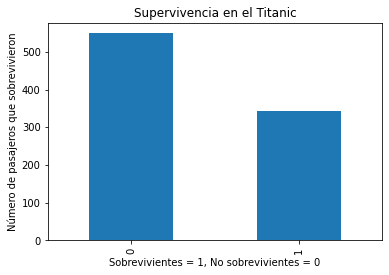

In [17]:
# Ya sabemos que la forma más rápida de hacer gráficas de pocas columnas es Pandas PLOT
# Entonces solo le pegamos el la grafica de Matplotlib

df.Survived.value_counts().plot(kind='bar')
plt.xlabel('Sobrevivientes = 1, No sobrevivientes = 0')
plt.ylabel('Número de pasajeros que sobrevivieron')
plt.title('Supervivencia en el Titanic')
plt.show()

Conclusiones:

- Murieron muchas más personas de las que se salvaron

# ¿Cómo seleccionar información concreta de nuestro dataset?

### Primera

In [18]:
# Puedo mecnionar el nombre de la coulmna dentro del DataSet todo dentro de brackets
df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

### Segunda

In [19]:
# Puedo llamar al dataframe y llamar a la columna con punto.
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

### Tercera  (CROSSTAB)

#### Esta es una manera de seleccionar informacion concreta y compararla con otra columna

In [20]:
# Me relaciona dos columnas de manera cruzada y me dice automaticamente cuantas tengo de cada tipo
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


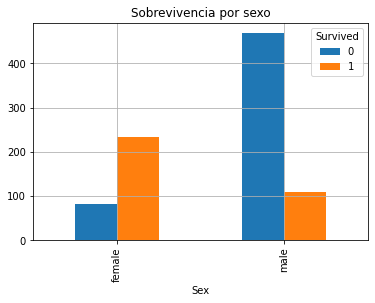

In [21]:
# Simpre que tenga un objeto de tipo dataframe le puedo simplemente agregara un .PLOT para visualizar una gráfica rápida
pd.crosstab(df.Sex, df.Survived).plot(kind='bar', grid=True, title='Sobrevivencia por sexo')
plt.show()

##### Conclusiones:
- La mayoría de las mujeres sobrevivieron
- La mayoría de los hombres murieron
- Murieron más del triple de hombres que de mujeres.

In [22]:
# Las conclusiones es la parte más importante de gráficos, su razón se ser. Si no existen coclusiones no se hizo nada.

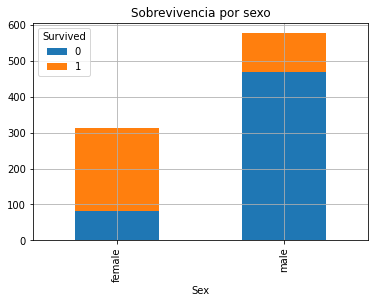

In [23]:
# Otra forma de relacionarlo
pd.crosstab(df.Sex, df.Survived).plot(kind='bar', grid=True, title='Sobrevivencia por sexo', stacked=True)
plt.show()

##### Conclusiones:

-  En esta gráfica se puede observar que habían casi el doble de hombres que de mujeres
- Menos de un tercio de todas las mujeres murieron
- Solo un poco más de un sexto del total de hombres sobrevivieron

In [24]:
pd.crosstab(df.Pclass,df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


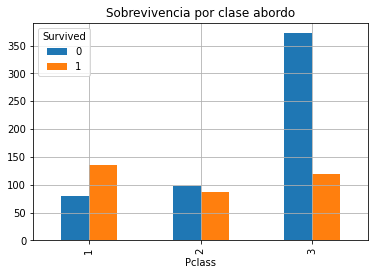

In [25]:
pd.crosstab(df.Pclass,df.Survived).plot(kind='bar',grid=True, title='Sobrevivencia por clase abordo')
plt.show()

Conclusiones:

- La mayoría de personas que murieron eran de tercera clase.
- En general sobrevivieron más personas de la primera clase.
- En segunda clase las cosas sucedieron de forma más estable. Sobrevivieron casi tantas personas como las que murieron.

## Cuarta 

#### Seleccionar infromación concreta con ---> GROUPBY

In [26]:
# Si queremos saber el sexo de los sobrevivientes
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

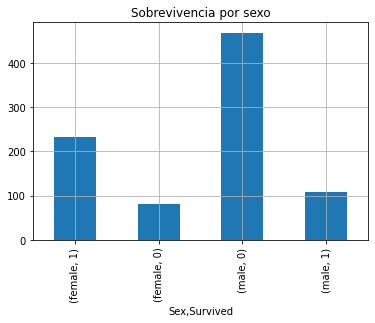

In [27]:
df.groupby('Sex').Survived.value_counts().plot(kind='bar',grid=True, title='Sobrevivencia por sexo')
plt.show()

Conclusiones:

- Sobrevivieron más del doble de mujeres que de hombres
- Murieron el doble de hombres que de mujeres sobrevivientes.


# Quinta

### Seleccionamos información concreta

Ejemplo:

- Selecciono aquellas filas donde Pclass == 1
- Me creo un dataframe de la misma forma que tenía antes

In [28]:
# Creo un dataframe unicamente con la infomracion de la primera clase para analizarla más a donde
df_sex_uno = df[df.Pclass==1]
df_sex_uno.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [29]:
# Selecciono la comparacion cruzada con la tabla de survived (Recordemos que es el output)

df_sex_uno_crosstab = df[df.Pclass==1]['Survived']
df_sex_uno_crosstab.head()

1     1
3     1
6     0
11    1
23    1
Name: Survived, dtype: int64

# Ejemplos de creación de dataframes concretos

In [30]:
#Aqui creamos un dataframe de los que sobreviven
# Para ello lo creamos con la columna Survived y lo filtramos por los datos que tengas valor de 1
df_sobrevivien_todos = df[df['Survived']==1]

# Hago otro dataframe para los que no sobreviven
df_sobrevivien_ninguno = df[df['Survived']==0]

##---------- Cuando son varias condiciones es importante utilizar el & y separar bien las condiciones
# Creo un dataframe para solo los hombres que sobreviven
hombres_supervivientes = df[(df['Survived']==1) & (df['Sex']=='male')]

# Otro para los hombre que no sobreviven
hombres_no_supervivientes = df[(df['Survived']==0) & (df['Sex']=='male')]

# Ahora hago lo mismo con las mujeres
mujeres_supervivientes = df[(df['Survived']==1) & (df['Sex']=='female')]

# Otro para los hombre que no sobreviven
mujeres_no_supervivientes = df[(df['Survived'])==0 & (df['Sex']=='female')]

In [31]:
# probamos

In [32]:
df_sobrevivien_todos.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [33]:
# Lo anterior nos mustra que solo estan los sobrevivinetes 
# Para volverlo a comprobar recorrermos el dataframe en la columna Survived 
# Esto nos mostrara que todos los que estan es la lista tienen valor 1 y el numero de registros.

# Vemos como faltan posiciones en el index
# El dataframe muestra el index que cada registro filtrado
df_sobrevivien_todos.Survived.value_counts()

1    342
Name: Survived, dtype: int64

In [34]:
# Vemos como faltan posiciones en el index
# El dataframe muestra el index que cada registro filtrado
df_sobrevivien_ninguno.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [35]:
# Vemos como faltan posiciones en el index
# El dataframe muestra el index que cada registro filtrado
df_sobrevivien_ninguno.Survived.value_counts()

0    549
Name: Survived, dtype: int64

In [36]:
# Vemos como faltan posiciones en el index
# El dataframe muestra el index que cada registro filtrado
hombres_supervivientes.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0,NaN,S
21,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D56,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5,A6,S


In [37]:
# Vemos como faltan posiciones en el index
# El dataframe muestra el index que cada registro filtrado
mujeres_supervivientes.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


# Obtenemos información de los gráficos

### Función para hacer gráficas de forma automática

In [38]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


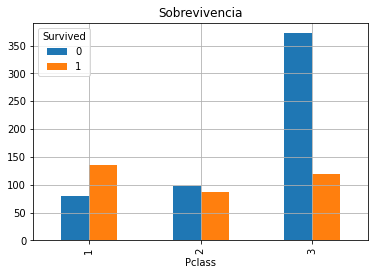

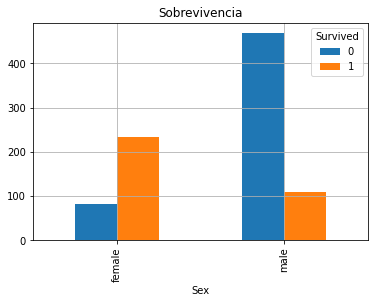

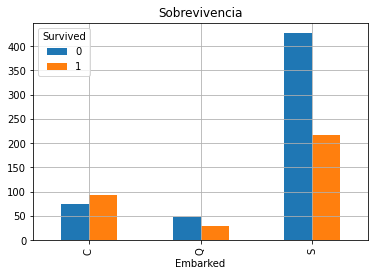

In [39]:
#Ahor alo que me interesa en automatizar todo
# o voy a hacer con un bucle for
# Incluyo las columnas que deseo trabajar y despues le asigno un crosstab a cada una
opciones = ['Pclass','Sex','Embarked']

for opcion in opciones:
    pd.crosstab(df[opcion], df.Survived).plot(kind='bar', grid=True, title='Sobrevivencia')

Conclusiones:

- La mayoría de los que murieron eran de la clase 3
- La mayoría de los muertos eran hombres
- La mayoría de los muertos embarcaron por la puerta S


## Algunos gráficos de Seaborn

c:\users\mauro.cespedesaraya\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\mauro.cespedesaraya\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\mauro.cespedesaraya\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


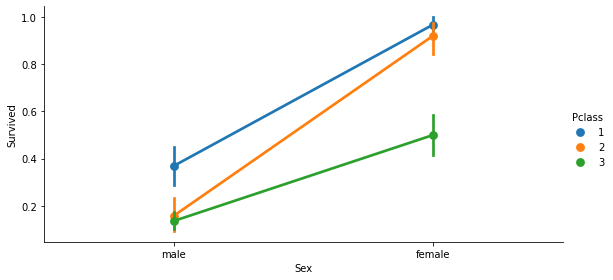

In [40]:
# User warning The 'Factorplot' funciton has been renamed to 'catplot'
# The original name will be removed in a future release

sns.factorplot('Sex','Survived',hue='Pclass', size=4,aspect=2,legend=True,data=df)
plt.show()


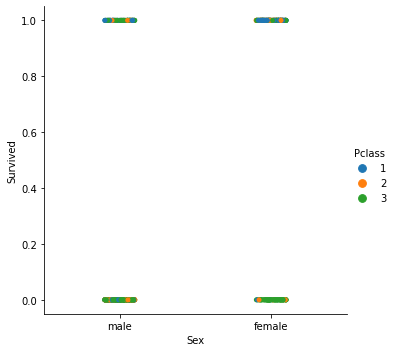

In [41]:
# De esta manera el gráfico no me sirve para nada.
# Lo estoy haciendo con catplot
# Hay que leer el warning que factorplot va a cambiar por catplt
sns.catplot(x='Sex',y='Survived',hue='Pclass', kind='strip',data=df)
plt.show()

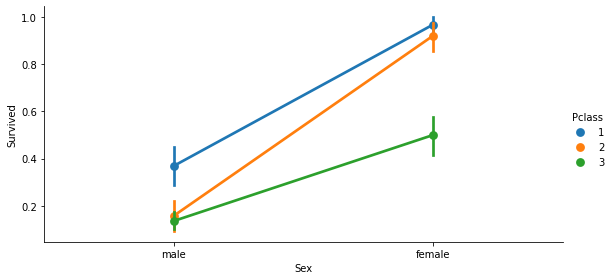

In [42]:
# Para hacer que nos muestre la gráfica que queremos lo programamamos asi
# Aqui ya estamos relacionando 3 columnas
sns.catplot(x='Sex',y='Survived',hue='Pclass', kind='point',height=4, aspect=2, data=df)
plt.show()

Conclusiones:

- Las mujeres de primera y segunda clase casi todas sobreviven
- Cuando son mujeres de tercera clase sobreviven más que los hombre de primera clase
- La mayoriá de los hombres de segunda y tercera clase no sobreviven



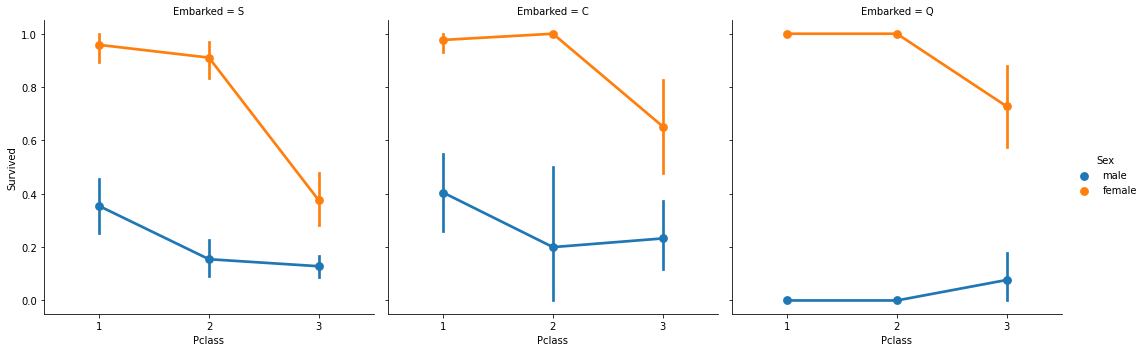

In [43]:
sns.catplot(x='Pclass',y='Survived',hue='Sex', col = 'Embarked', kind='point',data=df)
plt.show()

Conclusiones:

- Nos fijamos en la gráfica de la izquierda = 'Embarked

Las mujeres de 3 clase que embarcaron en S

fallecieron muchas en comparación con la clase 1 y 2

pese a ello sobrevivieron algo más que los hombres de la clase 1 embarcando por el mismo puerto.

- Los hombres con mayor porcentaje de supervivencia embarcaron en C
- Los hombres con menor porcentaje de supervivencia embarcaron en Q
- Vemos nuevamente como la mayoría de mujeres sobrevivió, pero no los hombres.

### Edad y Supervivencia

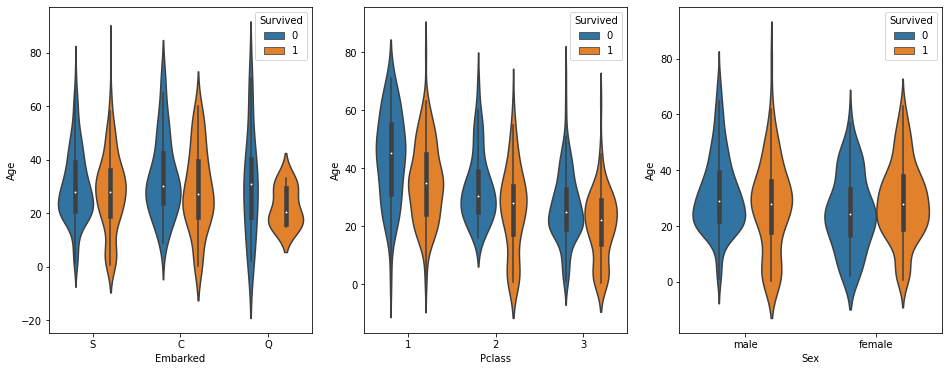

In [44]:
# Este es un tipo de gráfico que queda como un violin
fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x='Embarked', y = 'Age', hue='Survived', data = df, ax = ax1)
sns.violinplot(x='Pclass', y = 'Age', hue='Survived', data = df, ax = ax2)
sns.violinplot(x='Sex', y = 'Age', hue='Survived', data = df, ax = ax3)

plt.show()

### Hago un split=True para que me lo haga más visual

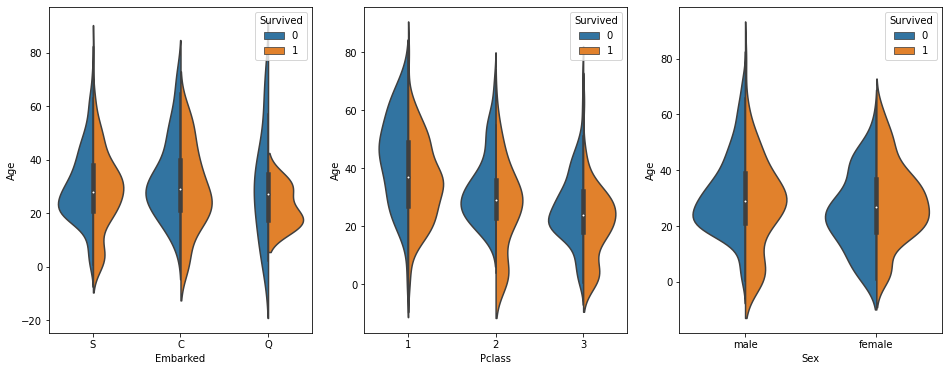

In [45]:
# Me creo una figura
fig = plt.figure(figsize=(16,6))

# Ahora hago 3 subplots
# Fila 1 3 columnas gráfica 1
ax1 = fig.add_subplot(131)
# Fila 1 3 columnas gráfica 2
ax2 = fig.add_subplot(132)
# Fila 1 3 columnas gráfica 3
ax3 = fig.add_subplot(133)


sns.violinplot(x='Embarked', y = 'Age', hue='Survived', data = df, split=True,ax = ax1)
sns.violinplot(x='Pclass', y = 'Age', hue='Survived', data = df, split=True, ax = ax2)
sns.violinplot(x='Sex', y = 'Age', hue='Survived', data = df, split=True, ax = ax3)

plt.show()

# Esto me permite ver las areas más gordas mucho mejor.

Conclusiones:

- EMBARKED y Age:

    - La gente de unos 18 - 35 años de Q Si sobrevivieron moyoritariamente (NO todos)
    - No hay porcentajes mayoritarios significativos en las otras 2 embarcaciones
    - En Q embarcaronbastantes niños los cuales no sobrevivieron
- PCLASS y Age:

    - De la 2da clase sobre toda la 3ra sobrevivieron las mayoria de sis niños

- Sex y Age:

    - Hay más ancianos que ancianas
    - Los jovenes (varón)menores de 20 años en general sobrevivieron pero no las muejres.

In [46]:
# Quiero ver l rango de edades en la grafica
# Min me muestra 0.42, que vienen siendo unos 5 meses
# Pero en la gráfica llega hasta -20
# Lo ideal sería que lo cortara en 0.42, pero lo hace así para darle continuidad hacia abajo y tenga una forma
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Head map

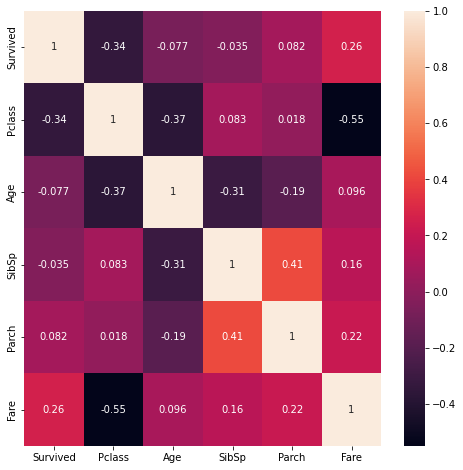

In [47]:
plt.figure(figsize=(8,8))

# La corelacion significa como se relaciona una columna con sigo misma y con todas las demás
# Se relaciona X con Y que a sus vez tienen representadas todas las columnas
sns.heatmap(df.corr(), annot=True)
plt.show()

Conclusiones:

- Existe una clara tendencia cuando se compara 'Age' con 'Fare'(Precio del billete). 
- Los niños (0-2) de primera clase (que pagaron más por el billete) fueron que los mejor sobrevivieron.
- Tambíen queda reflejado cuando comparamos 'Survived' con 'Age'. Simepre son los menores de 2 años los que presentaron mayores posibilidades de sobrevivencia.
- Sin embargo parece que lo recien nacidos (menores de 1 año) no tuvieron tasa de supervivencia (0.55)


### Barplot

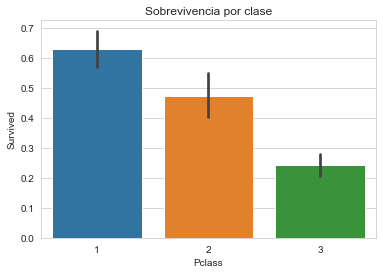

In [48]:
# Esto es una gráfica simple the Pclas con Survived
# Esto es para que muestre el grid
sns.set_style("whitegrid")

sns.barplot(x='Pclass',y='Survived', data=df).set(title='Sobrevivencia por clase')

plt.show()

Conclusiones:

- Los pasajeros de primera clase sobrevivieron más del doble que los pasajeros de tercera clase.

In [49]:
# Si quiero hacer más llamadas creo una funcion que recibe un parametro 

def funcion_graficas(feat):
    plt.subplot(2,1,1)
    df.groupby(feat).Survived.value_counts().plot(kind='bar',grid=True, title='Sobrevivencia por '+str(feat))
    plt.figure(figsize=(12,8))
    
    # Aqui combino el plot con el SNS barplot
    # La sintaxis cambia
    
    plt.subplot(2,1,2)
    sns.barplot(x=feat, y='Survived', data=df).set(title='Sobrevivencia por '+str(feat))
    plt.show()

In [50]:
# Ahora solo tengo que cambiar el parámetro y hago todas las llamadas que necesite

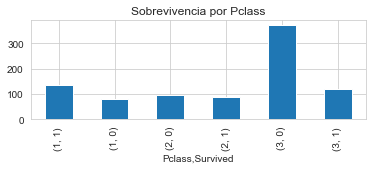

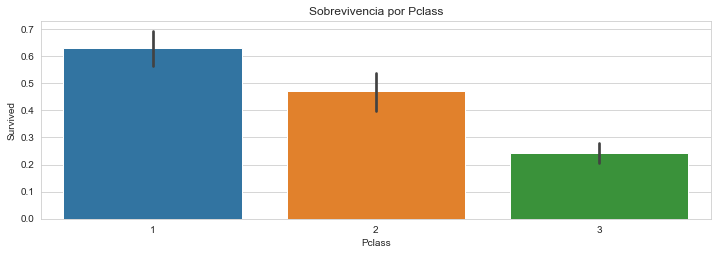

In [51]:
funcion_graficas('Pclass')

Conclusiones:

- La mayoría de muertos provenian de la tercera clase
- Casi el triple de personas de primera clase sobrevivieron comparadas con tercera clase.

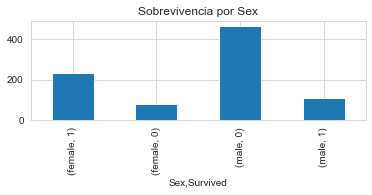

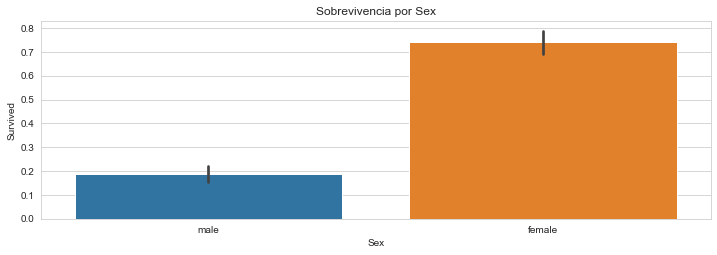

In [52]:
funcion_graficas('Sex')

Conclusiones:

- Murieron el doble de hombre que mujeres

In [53]:
# Esto es un ejemplo del tipo de gráficos que es mejor no mostrar porque no tiene sentido
# Este gráfico no muestra nada, se se adapta al tipo de gráfico
# Es un ejemplo a tomar en cuenta

#funcion_graficas('Age')

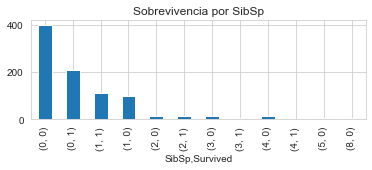

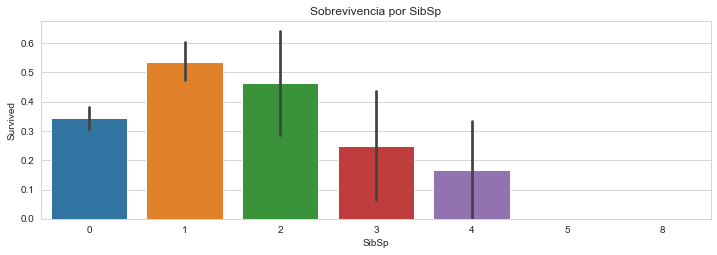

In [54]:
# Siblings and Spouse
# Las personas que iba como hermanos (as) o esposos(as)
funcion_graficas('SibSp')

Conclusiones:

- Las personas que tenían solo un familiar abordo sobrevivieron más
- Las personas con más de cuatro familiares abordo sobrevivieron menos

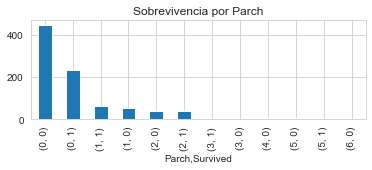

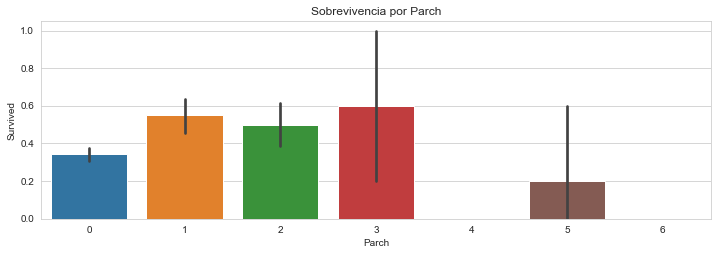

In [55]:
# PARCH el el numero de parents & childrens que estaban abordo.
funcion_graficas('Parch')

Conclusiones:

- Murieron menos personas que tenían a sus padres o hijos abordo.
- Según la gráfica hubo más posibilidades de sobrevivir cuando los miembros de la familia eran 3
- Sin embargo cunado eran familias de más de 5 miembros las posibilidades de sobrevivencia diminuyeron muchisimo.

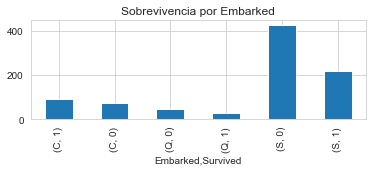

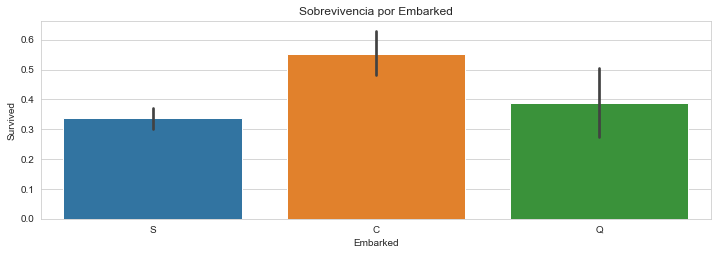

In [56]:
funcion_graficas('Embarked')

Conclusiones:

- Las personas que embarcaron por la 'C' sobrevivieron más
- Murieron más personas que embarcaron por la puerta 'S'

## Segunda parte de la actividad 4: (hasta 4 puntos)


##### Pregunta -1-

-Si estás trabajando con un set de datos, y necesitas ver rápidamente la
información de una columna con un gráfico.

-¿Qué librería usarías? ¿Por qué? 
Si quieres puedes añadir un ejemplo. No es necesario, no obstante.


    - Si quiero hacer un gráfico rápido de una columna o dos , la mejor opcion es Pandas.
    - Tan solo con adjuntar un .plot() a un data frame se puede generar un gráfico.

<AxesSubplot:>

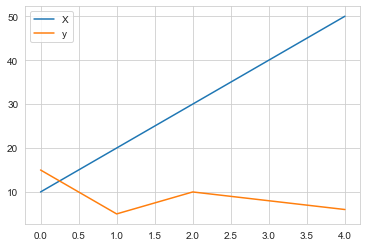

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({"X": [10,20,30,40,50],"y":[15,5,10,8,6]})
df.plot()

#### Pregunta -2-

- ¿Te parece difícil la forma en que creamos “nuevos DataFrames”?
(seleccionando solo ciertas filas o columnas, bajo ciertas condiciones o
premisas).

Nota: Sobre esto hemos hablado en el punto 5 del Manual
(Esta parte será puntuada solamente por el mero hecho de responder a la
misma, independientemente de lo que se diga).




- No me parece difícil, pero si es importante tener cuidado a la hora de utilizar varias condiciones. 

- Al unirse varias condiciones se puede filtrar mucho mejor de manera fácil.
    
> Es importante saber que aveces el **&** funciona mejor que un **and** a la hora de unir condiciones. 
    
- Es una buena opción cuando se quiere hilbanar más fino dentro de un segmento de datos específico. 





#### Pregunta -3-

- Busca algo de información acerca de “Heatmap” y explica con tus palabras lo
que consideres oportuno

- Puedes añadir ejemplos o lo que quieras.


Es una librería de Seaborn que nos permite realizar gráficas de matrices de forma ***color-encoded***.

De esta manera los valores más grandes se representaban en pequeños cuadrados (píxeles) grises o negros y los valores más pequeños en otros cuadrados más claros.

##### La siguiente es la forma básica:


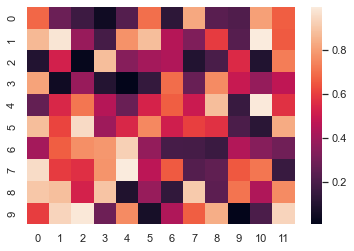

In [58]:
sns.set_theme()

# Utilizamos un array numpy en lugar de un dataset
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

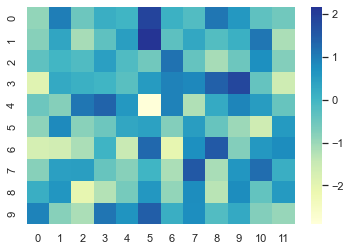

In [59]:
#También es posible cambiar el tono de la escala de colores
normal_data = np.random.randn(10, 12)
ax = sns.heatmap(normal_data, center=0,  cmap="YlGnBu")

#### Pregunta -4-

Hemos usado diferentes tipos de gráficos.

- ¿Se entiende bien cuando usar un “violinplot” o un “factorplot” por ejemplo?

- ¿Serías capaz de emplearlo en otro set de datos?

(Esta parte de la actividad será puntuada solamente por el mero hecho de
ser respondida, independientemente de lo que se diga).

Recuerda que existen más tipos de Gráficos, no obstante, y lo más
importante es la “extracción de información” de los mismos

- Violin plot te deja ver los datos de una manera más simple. Es fácil relacionar el volumen de las areas con los datos que se buscan.

- Se utiliza mejor cuando se requiere comparar muchas columnas entres sí.

- Me parece que si podróa implementar en otra set de datos.